In [1]:
from specim_test.specim.specfuncs import spec2d, spec1d
from astropy.io import fits as pf
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
#infile = 'J2145_deimos_det2_101_clean.fits'
infile = 'J2145_DEIMOS_spectra/J2145_deimos_det2_101_clean.fits'

In [3]:
spec = spec2d.Spec2d(infile, hext=1, varext=2, xtrim=[0, -5])


Loading file J2145_DEIMOS_spectra/J2145_deimos_det2_101_clean.fits
-----------------------------------------------
Read in 2-dimensional spectrum from J2145_DEIMOS_spectra/J2145_deimos_det2_101_clean.fits (HDU=1)
The input dataset was trimmed
 xrange: 0:-4.  yrange: 0:4096
Final data dimensions (x y): 87 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 87



Text(0, 0.5, 'Angstrom')

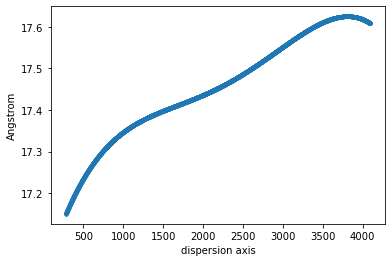

In [4]:
wavim  = pf.open(infile)[4].data
diff = []
spec_pix = np.arange(4096)
for i in range(wavim.shape[0]):
    diff.append(np.max(wavim[i:i+1, :]) - np.min(wavim[i:i+1, :]))
    
plt.figure(facecolor='white') #'#94F008'
plt.plot(spec_pix[280:], diff[280:] , '.')
plt.xlabel('dispersion axis')
plt.ylabel('Angstrom')


Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096


Dispersion : 0.630000
Found 1113 NaNs in the two-dimensional spectrum

sky subtracted and cosmic ray rejected data has been resampled along with vardata in place of the coordinateds whcih rectify the tilted wave image


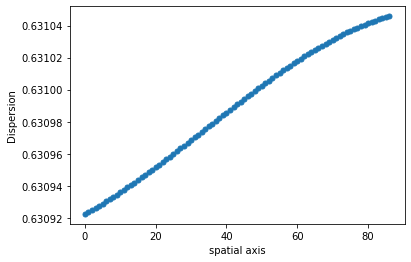

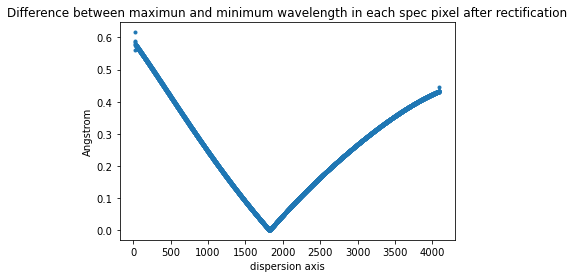

In [5]:
spec.set_dispaxis('y')
spec.do_waverect(doplot=True)

Profile max value (before normalization) 3661.552490


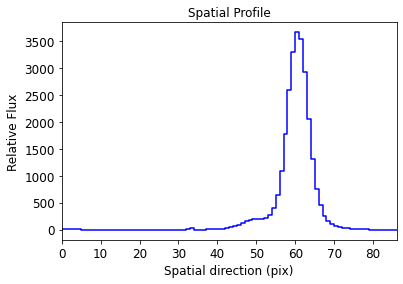

In [6]:
#%matplotlib notebook
profile = spec.spatial_profile(pixrange=[2100, 2500])


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 1
Number of Moffat profile : 3

Now enter constants of the background polynomial upto degree 0
c0 : 2

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 300, 49, 2

amplitude=300.000000, mu=49.000000, sigma=2.000000

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 3600, 62.5, 3, 4

amplitude=3600.000000, x_0=62.500000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 2800, 59.8, 3, 4

amplitude=2800.000000, x_0=59.800000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 3 : 70, 53.5, 2, 3

amplitude=70.000000, x_0=53.500000, gamma=2.000000, alpha=3.000000

Fi

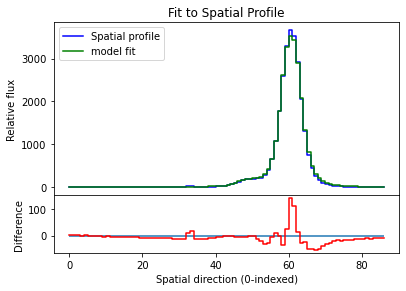

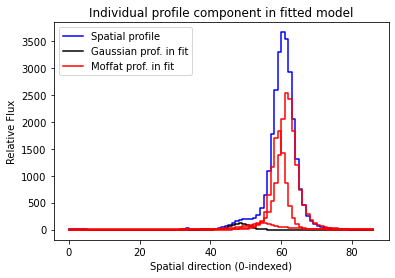


Do you want to start over ? : type yes/no
no


<CompoundModel(c0_0=-0.9960257, amplitude_1=113.08115097, mean_1=49.00035264, stddev_1=2.56914869, amplitude_2=2572.9578424, x_0_2=62.3390087, gamma_2=3.63513706, alpha_2=1.78835596, amplitude_3=1855.70408051, x_0_3=59.72777675, gamma_3=4.21464937, alpha_3=3.03710839, amplitude_4=123.95393575, x_0_4=54.95799851, gamma_4=4.10120275, alpha_4=0.84691017)>

In [7]:
spec.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3] + [4]
Components: 
    [0]: <Polynomial1D(0, c0=-0.92616602)>

    [1]: <Gaussian1D(amplitude=155.16286709, mean=49.32213546, stddev=3.10382204)>

    [2]: <Moffat1D(amplitude=2352.43807146, x_0=62.22213546, gamma=4.31223319, alpha=2.35955429)>

    [3]: <Moffat1D(amplitude=1959.11364368, x_0=59.92213546, gamma=4.31223319, alpha=2.35955429)>

    [4]: <Moffat1D(amplitude=7.18919206, x_0=52.92213546, gamma=4.31223319, alpha=2.35955429)>
Parameters:
            c0_0           amplitude_1     ...      gamma_4           alpha_4      
    ------------------- ------------------ ... ----------------- ------------------
    -0.9261660150032704 155.16286709319536 ... 4.312233188008913 2.3595542935464375

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [

<IPython.core.display.Javascript object>


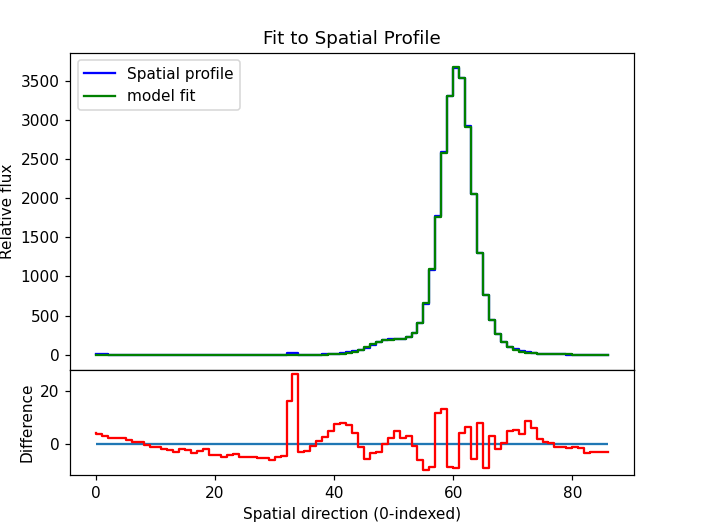

<IPython.core.display.Javascript object>


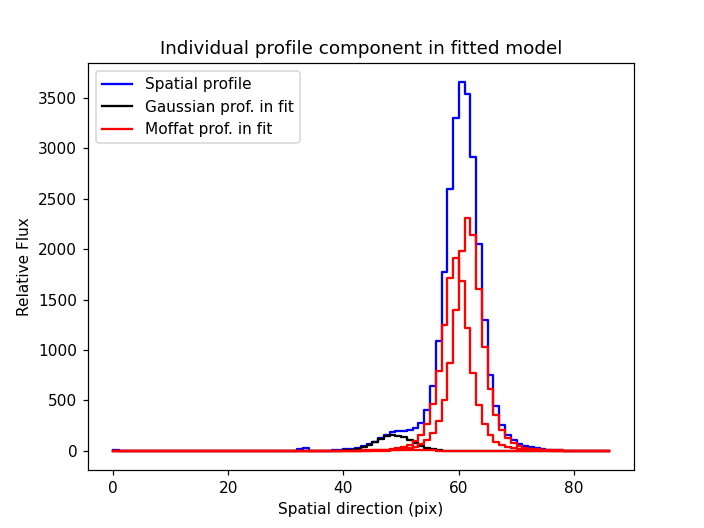

<CompoundModel(c0_0=-0.53398762, amplitude_1=155.57327308, mean_1=49.27224272, stddev_1=3.07316824, amplitude_2=2323.43063666, x_0_2=62.17224272, gamma_2=4.57572769, alpha_2=2.50985465, amplitude_3=1912.17518458, x_0_3=59.97224272, gamma_3=4.57572769, alpha_3=2.50985465, amplitude_4=11.90663735, x_0_4=52.87224272, gamma_4=4.57572769, alpha_4=2.50985465)>

In [47]:
def tie_pos1_moffat(model):
     return model.x_0_2 - 2.2
            
def tie_pos2_moffat(model):
    return model.x_0_2 - 9.3

def tie_pos3_moffat(model):
    return model.x_0_2 - 12.9

def tie_gamma_moffat(model):
    return model.gamma_2

def tie_alpha_moffat(model):
    return model.alpha_2 

spec.mod0[1].mean.tied = tie_pos3_moffat
spec.mod0[3].x_0.tied = tie_pos1_moffat
spec.mod0[4].x_0.tied = tie_pos2_moffat
#spec.mod0[4].x_0.tied = tie_pos3_moffat
#spec.mod0[2].gamma.tied = tie_gamma_moffat
#spec.mod0[2].alpha.tied = tie_alpha_moffat
spec.mod0[3].gamma.tied = tie_gamma_moffat
spec.mod0[3].alpha.tied = tie_alpha_moffat
spec.mod0[4].gamma.tied = tie_gamma_moffat
spec.mod0[4].alpha.tied = tie_alpha_moffat
spec.refined_model(spec.mod0)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 163 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 4 to parameter: mean_1
Fitting polynomial of degree 3 to parameter: stddev_1
Fitting polynomial of degree 4 to parameter: x_0_2
Fitting polynomial of degree 3 to parameter: gamma_2
Fitting polynomial of degree 3 to parameter: alpha_2
Fitting polynomial of degree 4 to parameter: x_0_3
Fitting polynomial of degree 3 to parameter: gamma_3
Fitting polynomial of degree 3 to parameter: alpha_3
Fitting polynomial of degree 4 to parameter: x_0_4
Fitting polynomial of degree 3 to parameter: gamma_4
Fitting polynomial of degree 3 to parameter: alpha_4


<IPython.core.display.Javascript object>


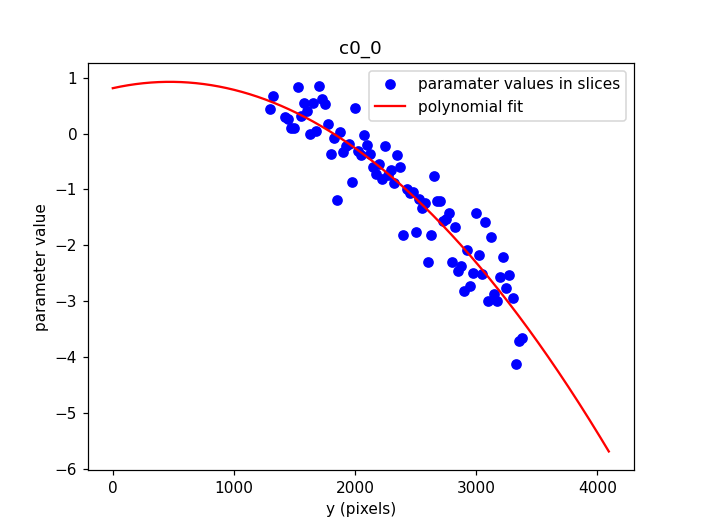

<IPython.core.display.Javascript object>


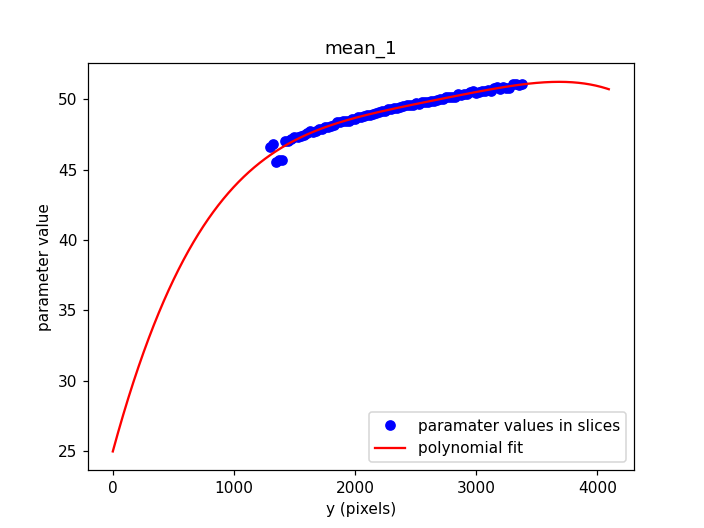

<IPython.core.display.Javascript object>


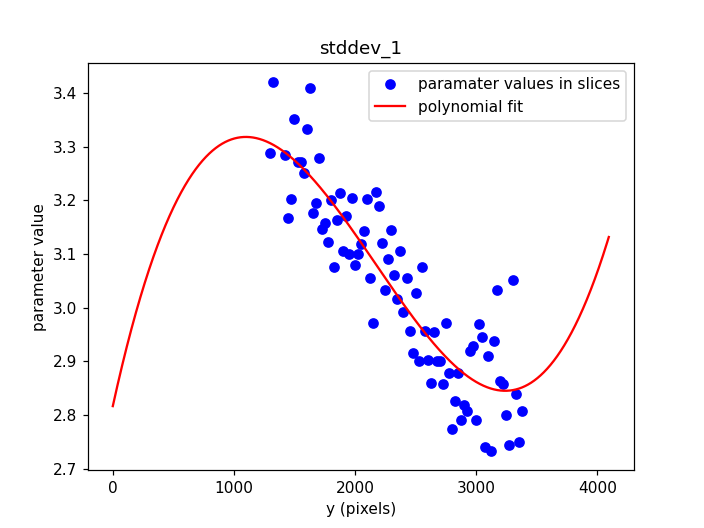

<IPython.core.display.Javascript object>


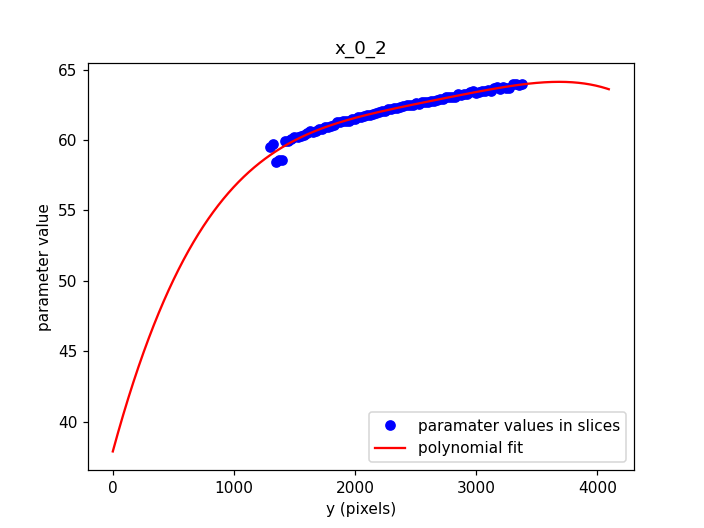

<IPython.core.display.Javascript object>


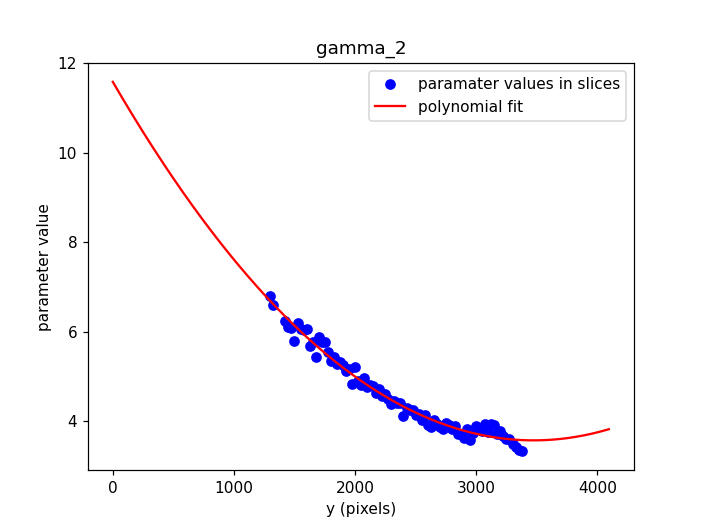

<IPython.core.display.Javascript object>


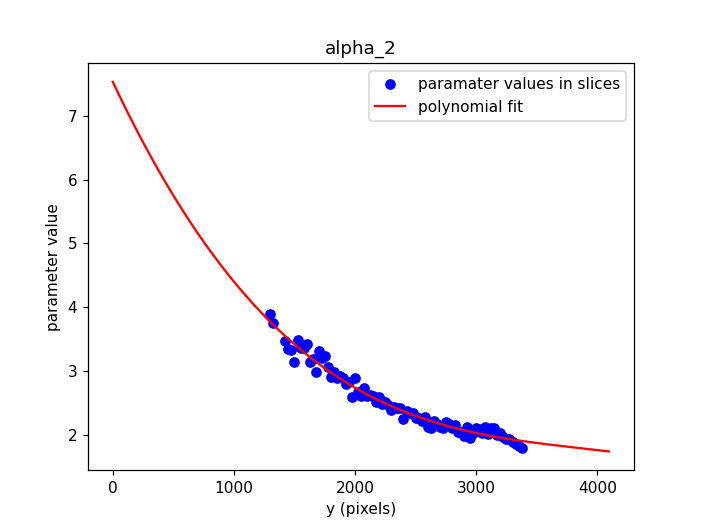

<IPython.core.display.Javascript object>


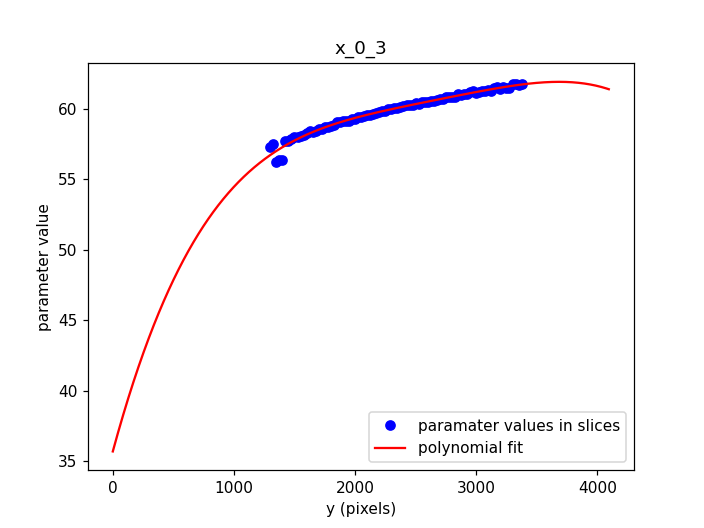

<IPython.core.display.Javascript object>


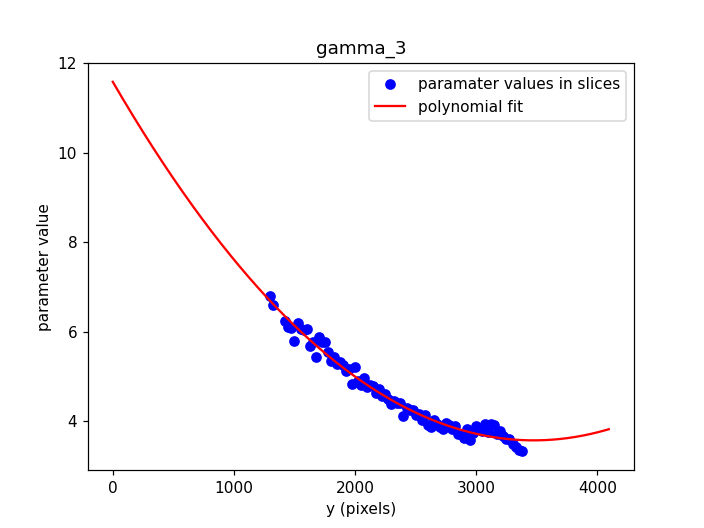

<IPython.core.display.Javascript object>


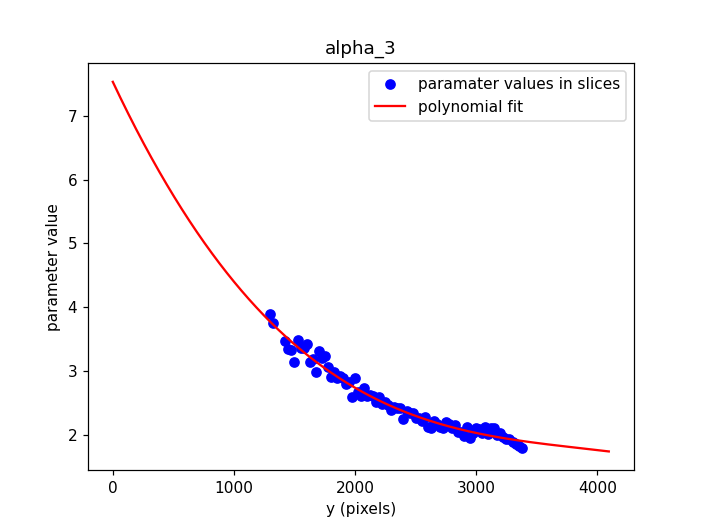

<IPython.core.display.Javascript object>


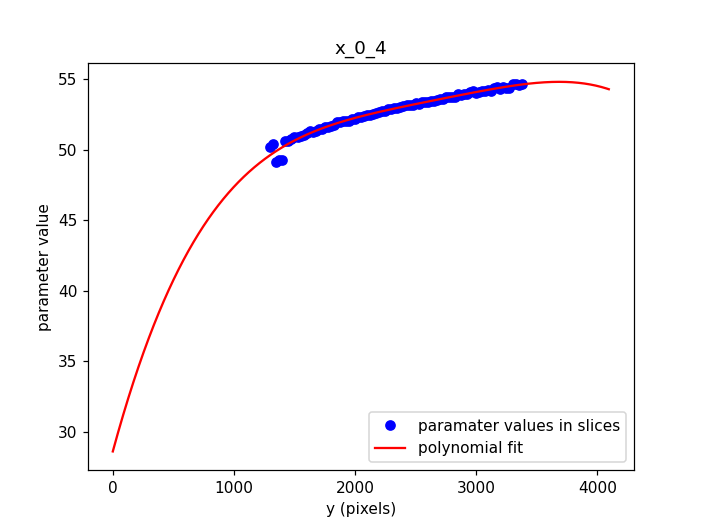

<IPython.core.display.Javascript object>


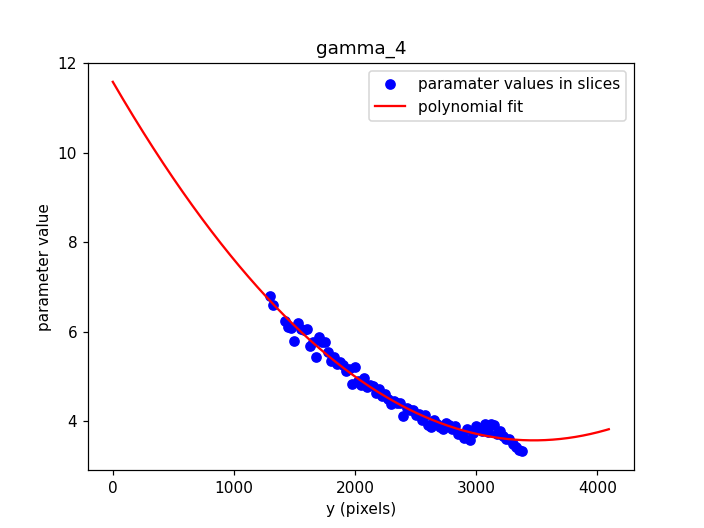

<IPython.core.display.Javascript object>


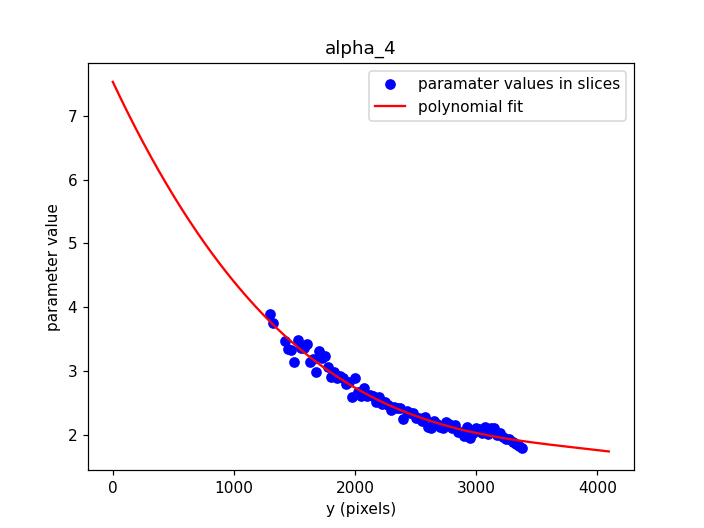

In [54]:
spec.find_and_trace(spec.mod0, stepsize=25, fitorder={'x_0_1':4, 'x_0_2':4, 'x_0_3':4, 'x_0_4':4, 'mean_1':4},
                    fitrange=[1300, 3400], polyorder=3)

Fitting to 4 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 1000 - 4096
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5355.18
 Spectrum End:     7304.91
 Dispersion (1st pixel):   0.63
 Dispersion (average):      0.63

 Spectrum Start:  5355.18
 Spectrum End:     7304.91
 Dispersion (1st pixel):   0.63
 Dispersion (average):      0.63

 Spectrum Start:  5355.18
 Spectrum End:     7304.91
 Dispersion (1st pixel):   0.63
 Dispersion (average):      0.63

 Spectrum Start:  5355.18
 Spectrum End:     7304.91
 Dispersion (1st pixel):   0.63
 Dispersion (average):      0.63


Plotting the spectrum


<IPython.core.display.Javascript object>


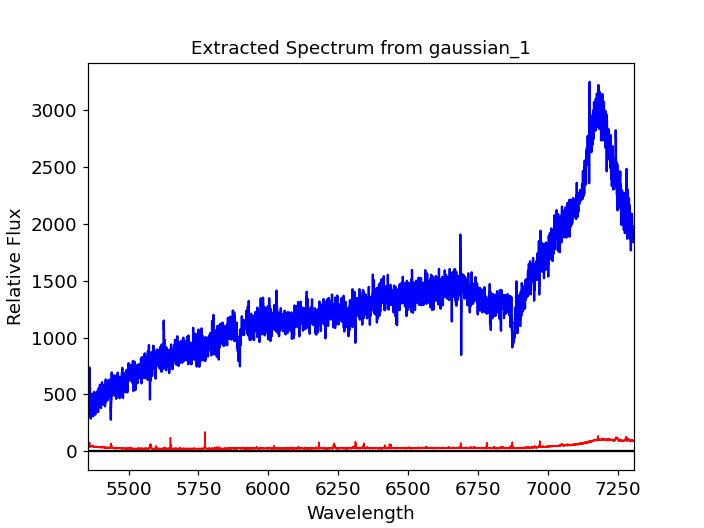

<IPython.core.display.Javascript object>


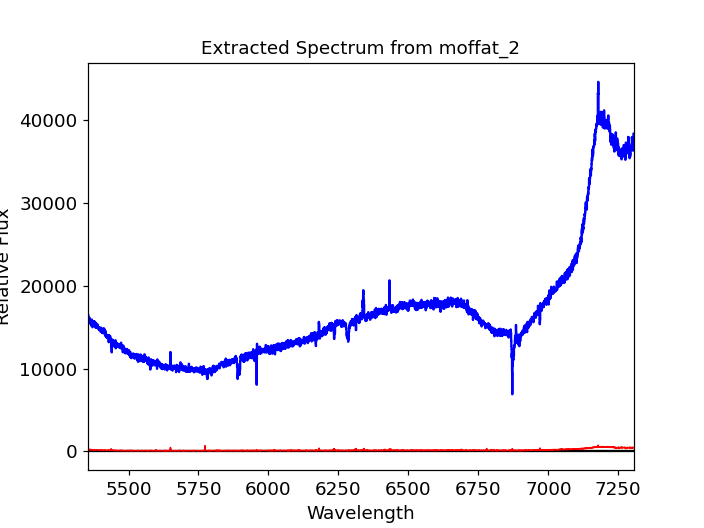

<IPython.core.display.Javascript object>


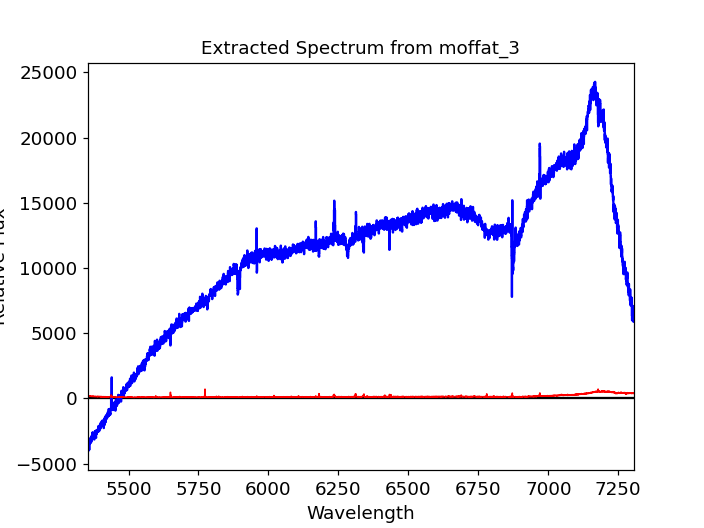

<IPython.core.display.Javascript object>


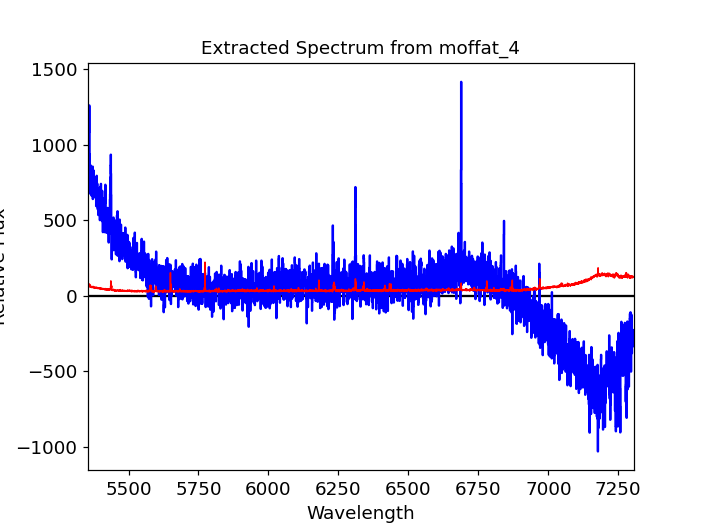

In [55]:
spec.extract(method='modelfit', extrange=[1000, -1])#[1000, -1]

In [56]:
sp_d = spec1d.Spec1d(flux=spec.spectra[3][1]['flux'], wav=spec.spectra[3][1]['wav'], 
                    var=spec.spectra[3][1]['var'], trimsec=[0, -1])

 Spectrum Start:  5355.18
 Spectrum End:     7304.29
 Dispersion (1st pixel):   0.63
 Dispersion (average):      0.63



<IPython.core.display.Javascript object>


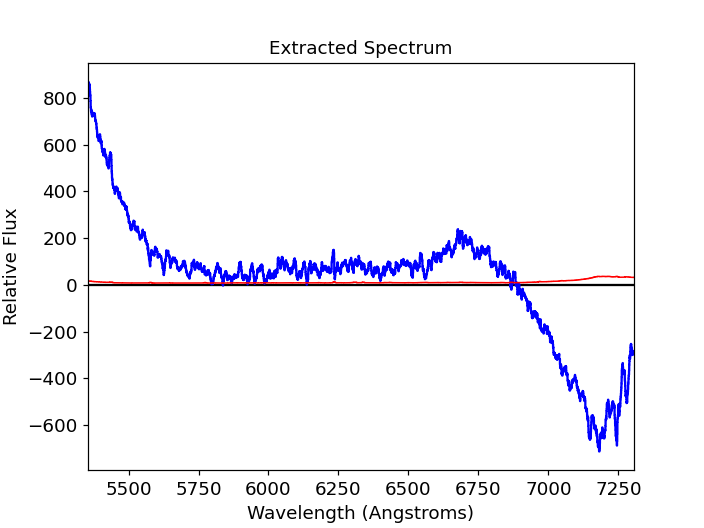

In [57]:
#%matplotlib notebook
sp_d.smooth(15)
#sp_d.mark_lines('abs', z=0.417, usesmooth=True)